# Проект: Линейные модели в машинном обучении

## Описание проекта


Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.

### Цель исследования
Определить наиболее эффективных коров для покупки в «ЭкоФерме» 

### Задачи исследования
Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
* Первая будет прогнозировать возможный удой коровы (целевой признак Удой);

* Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

### Исходные данные
* ferma_main.csv - данные о стаде фермера на текущий момент
* ferma_dad.csv - имя папы каждой коровы в стаде фермера
* cow_buy.csv - данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой

### Данное исследование разделим на несколько частей
1. Подключение библиотек
2. Загрузка данных
3. Предобработка данных
4. Исследовательский анализ данных
5. Корреляционный анализ
6. Обучение модели линейной регрессии
7. Обучение модели логистической регрессии
8. Итоговые выводы

## Подключение библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

## Загрузка данных

In [2]:
ferma_main = pd.read_csv('datasets/ferma_main.csv', delimiter=';')
ferma_dad = pd.read_csv('datasets/ferma_dad.csv', delimiter=';')
cow_buy = pd.read_csv('datasets/cow_buy.csv', delimiter=';')

In [3]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


Рассмотрим датафрейм, который содержит данные о стаде фермера на текущий момент. Каждая строка - данные об одной из коров. Указаны порода, возраст, информация о молоке такая, как ЭКЕ (Энергетическая кормовая единица), СПО (Сахаро-протеиновое соотношение), Жирность, Белок. Также есть оценка вкуса молока и удой в кг. 

In [4]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Этот датафрейм хранит имя папы каждой коровы в стаде фермера - id коровы и имя папы коровы. 

In [5]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


В датафрейме cow_buy хранятся данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Они похожи на ferma_main, но отсутсвуют признаки, которые надо предсказать - удой за год и вкус молока. 

Таким образом, мы рассмотрели предоставленные нам данные и убедились, что они соответствуют задаче. 

##  Предобработка данных

Чтобы с данными было проще работать, выполним первичную предобработку. Напишем функции для проверки данных на дубликаты и пропуски. 

In [6]:
def passes(df):
    print(df.isnull().sum())

In [7]:
print(f'Датафрейм: ferma_main')
passes(ferma_main)
print('-------------------------------------------')
print(f'Датафрейм: ferma_dad')
passes(ferma_dad)
print('------------------------------')
print(f'Датафрейм: cow_buy')
passes(cow_buy)

Датафрейм: ferma_main
id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64
-------------------------------------------
Датафрейм: ferma_dad
id          0
Имя Папы    0
dtype: int64
------------------------------
Датафрейм: cow_buy
Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64


Видим, что не в одном из столбцов нет пропусков

In [8]:
def duplicates(df):
    print(df.duplicated().sum())

In [9]:
duplicates(ferma_main)
duplicates(ferma_dad)
duplicates(cow_buy)

5
0
4


В датафрейме ferma_main немного дубликатов - можем удалить эти строки.

In [10]:
ferma_main = ferma_main.drop_duplicates(keep='first').reset_index(drop=True)
duplicates(ferma_main)

0


Проверим типы данных - напишем функцию

In [11]:
def data_types(df):
    print(df.dtypes)

In [12]:
print(f'Датафрейм: ferma_main')
data_types(ferma_main)
print('------------------------------------------------')
print(f'Датафрейм: ferma_dad')
data_types(ferma_dad)
print('----------------------------------')
print(f'Датафрейм: cow_buy')
data_types(cow_buy)

Датафрейм: ferma_main
id                                        int64
Удой, кг                                  int64
ЭКЕ (Энергетическая кормовая единица)    object
Сырой протеин, г                          int64
СПО (Сахаро-протеиновое соотношение)     object
Порода                                   object
Тип пастбища                             object
порода папы_быка                         object
Жирность,%                               object
Белок,%                                  object
Вкус молока                              object
Возраст                                  object
dtype: object
------------------------------------------------
Датафрейм: ferma_dad
id           int64
Имя Папы    object
dtype: object
----------------------------------
Датафрейм: cow_buy
Порода                     object
Тип пастбища               object
порода папы_быка           object
Имя_папы                   object
Текущая_жирность,%         object
Текущий_уровень_белок,%    object
Возраст 

Поменяем типы данных в некоторых столбцах с строками на float, предварительно заменим в таких числах запятые на точки: 

In [13]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'].str.replace(',', '.').astype(float)

In [14]:
ferma_main['СПО (Сахаро-протеиновое соотношение)'] = ferma_main['СПО (Сахаро-протеиновое соотношение)'].str.replace(',', '.').astype(float)

In [15]:
ferma_main['Белок,%'] = ferma_main['Белок,%'].str.replace(',', '.').astype(float)

In [16]:
ferma_main['Жирность,%'] = ferma_main['Жирность,%'].str.replace(',', '.').astype(float)

In [17]:
cow_buy['Текущая_жирность,%'] = cow_buy['Текущая_жирность,%'].str.replace(',', '.').astype(float)

In [18]:
cow_buy['Текущий_уровень_белок,%'] = cow_buy['Текущий_уровень_белок,%'].str.replace(',', '.').astype(float)

Итоговые данные:

In [19]:
print(f'Датафрейм: ferma_main')
data_types(ferma_main)
print('------------------------------------------------')
print(f'Датафрейм: ferma_dad')
data_types(ferma_dad)
print('----------------------------------')
print(f'Датафрейм: cow_buy')
data_types(cow_buy)

Датафрейм: ferma_main
id                                         int64
Удой, кг                                   int64
ЭКЕ (Энергетическая кормовая единица)    float64
Сырой протеин, г                           int64
СПО (Сахаро-протеиновое соотношение)     float64
Порода                                    object
Тип пастбища                              object
порода папы_быка                          object
Жирность,%                               float64
Белок,%                                  float64
Вкус молока                               object
Возраст                                   object
dtype: object
------------------------------------------------
Датафрейм: ferma_dad
id           int64
Имя Папы    object
dtype: object
----------------------------------
Датафрейм: cow_buy
Порода                      object
Тип пастбища                object
порода папы_быка            object
Имя_папы                    object
Текущая_жирность,%         float64
Текущий_уровень_белок,%  

Выведем уникальные значения столбца с породами пап быков

In [20]:
ferma_main['порода папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

Видим, что есть два почти одинаковых значения - 'Айдиал' и 'Айдиалл'. Скорее всего это одинаковая порода, которую иногда записывали с ошибкой. Заменим значения

In [21]:
ferma_main['порода папы_быка'] = ferma_main['порода папы_быка'].str.replace('Айдиалл', 'Айдиал')
ferma_main['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [22]:
cow_buy['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

В таблице cow_buy такой проблемы нет

In [23]:
ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

В столбце с типом пастбища также поменяем два похожих значения на одно

In [24]:
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].str.replace('Равнинные', 'Равнинное')
ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [25]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Переименуем колонки в ferma_main 

In [26]:
ferma_main.columns = ['id', 'Удой', 'ЭКЕ', 'Сырой протеин', 'СПО', 'Порода', 'Тип пастбища', 'Порода папы_быка', 'Жирность,%', 'Белок,%', 'Вкус молока', 'Возраст']
ferma_main.head()

,id,Удой,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


В этом пункте мы устранили проблемы в данных и сделали работу с ними более удобной:
1. Удалили дубликаты в cow_buy и ferma_main
2. Привели некоторые столбцы с числовыми данными к правильным типам - int и float
3. Удалили неявные дубликаты в ferma_main столбцах с породой папы быка и типом пастбища
4. Переименовали столбцы в ferma_main

## Исследовательский анализ данных

В этом пункте проведем статистический анализ всех признаков, построим графики, посмотрим получше на распределения данных и выбросы

In [27]:
ferma_main.head()

,id,Удой,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [28]:
len(ferma_main['Удой'].unique())

528

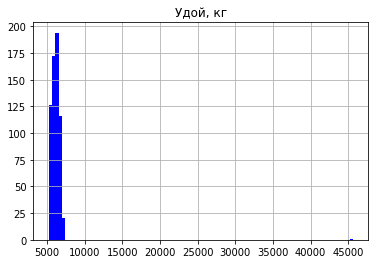

In [29]:
ferma_main['Удой'].hist(bins=90, color='blue')
plt.title("Удой, кг")
plt.show()

В столце с удоем видим выбросы - значения более 45000 кг - вероятнее этого это аномальные значения и их можно удалить

In [30]:
ferma_main = ferma_main.loc[ferma_main['Удой'] < 10000]

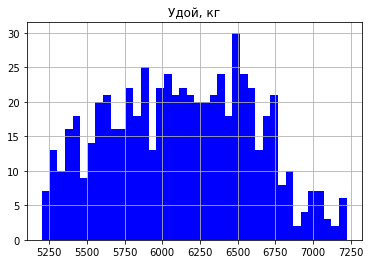

In [31]:
ferma_main['Удой'].hist(bins=40, color='blue')
plt.title("Удой, кг")
plt.show()

Удой коров имеет распределение от 0 до 600 кг

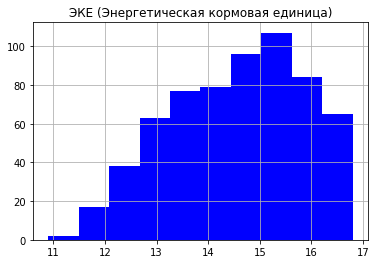

In [32]:
ferma_main['ЭКЕ'].hist(color='blue')
plt.title("ЭКЕ (Энергетическая кормовая единица)")
plt.show()

Видим, что пик ЭКЕ примерно в 15.5

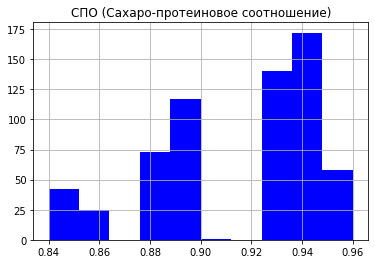

In [33]:
ferma_main['СПО'].hist(bins=10, color='blue')
plt.title("СПО (Сахаро-протеиновое соотношение)")
plt.show()

In [34]:
len(ferma_main['СПО']) ** 0.5

25.059928172283335

Чем ближе значение СПО к единице, тем больше коров с таким значением

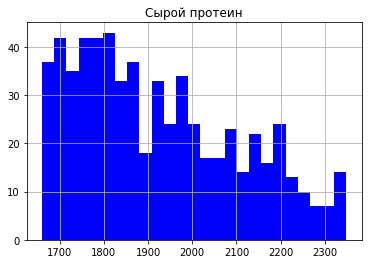

In [35]:
ferma_main['Сырой протеин'].hist(bins=25, color='blue')
plt.title("Сырой протеин")
plt.show()

Наиболее частое значение протеина - 1700-1800 г. С увелечением количества, значений становится меньше. 

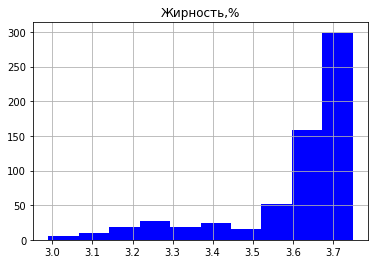

In [36]:
ferma_main['Жирность,%'].hist(bins=10, color='blue')
plt.title("Жирность,%")
plt.show()

Пик жирности молока - 3.6-3.7%. Остальных значений сравнительно немного

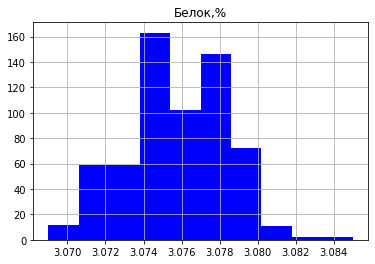

In [37]:
ferma_main['Белок,%'].hist(color='blue')
plt.title("Белок,%")
plt.show()

In [38]:
ferma_main['Белок,%'].value_counts()

3.076    102
3.075     90
3.077     79
3.074     73
3.078     67
3.073     59
3.079     50
3.072     38
3.080     22
3.071     21
3.070     11
3.081     11
3.082      2
3.085      2
3.069      1
Name: Белок,%, dtype: int64

Наиболее частые значения белка в молоке - 3,075 и 3,076%. 

<AxesSubplot:ylabel='Вкус молока'>

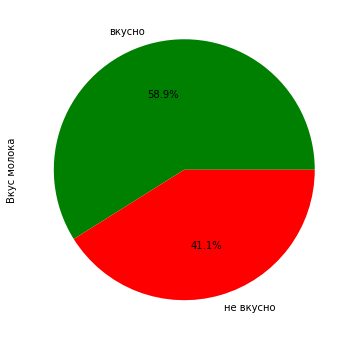

In [39]:
ferma_main_table = ferma_main['Вкус молока'].value_counts()
ferma_main_table.index = ['вкусно', 'не вкусно']
ferma_main_table.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['g', 'r'])

В целевой переменной "Вкус молока" наблюдается дисбаланс, это может привести к тому, что метрика accuracy становится неэффективной. Так как модель может научиться предсказывать преобладающий класс и будет бесполезна в предсказании другого. Вместо нее лучше использовать precision и recall

<AxesSubplot:ylabel='Возраст'>

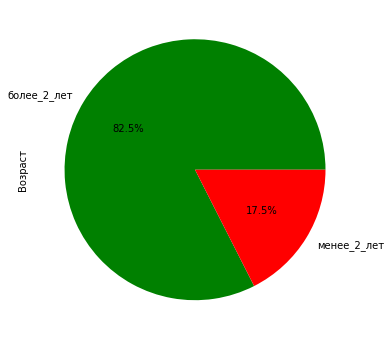

In [40]:
ferma_main_table = ferma_main['Возраст'].value_counts()
ferma_main_table.index = ['более_2_лет', 'менее_2_лет']
ferma_main_table.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['g', 'r'])

Коров с возрастом более 2-х лет гораздо больше тех, кто младше 2

<AxesSubplot:ylabel='Порода папы_быка'>

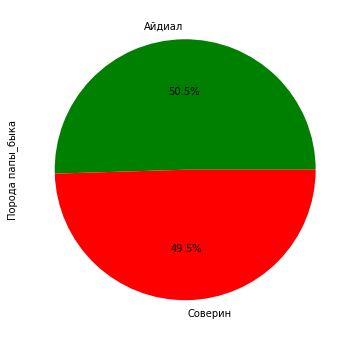

In [41]:
ferma_main_table = ferma_main['Порода папы_быка'].value_counts()
ferma_main_table.index = ferma_main['Порода папы_быка'].unique()
ferma_main_table.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['g', 'r'])

<AxesSubplot:ylabel='Тип пастбища'>

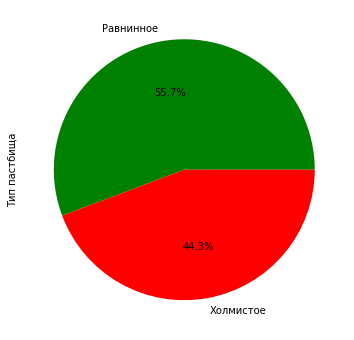

In [42]:
ferma_main_table = ferma_main['Тип пастбища'].value_counts()
ferma_main_table.index = ferma_main['Тип пастбища'].unique()
ferma_main_table.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['g', 'r'])

С небольшим отрывом преобладают коровы на равнинном пастбище

<AxesSubplot:ylabel='Порода'>

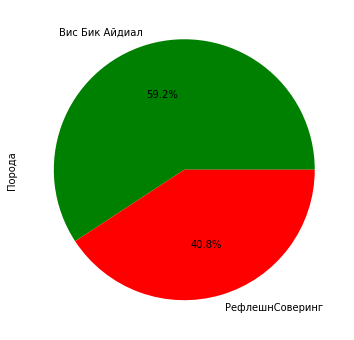

In [43]:
ferma_main_table = ferma_main['Порода'].value_counts()
ferma_main_table.index = ['Вис Бик Айдиал', 'РефлешнСоверинг']
ferma_main_table.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['g', 'r'])

Коров, породы Вис Бик Айдиал больше коров с породой РефлешнСоверинг

In [44]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [45]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [46]:
cow_buy['Текущая_жирность,%'].unique()

array([3.58, 3.54, 3.59, 3.4 , 3.64, 3.63, 3.57, 3.73, 3.68, 3.42, 3.77,
       3.34])

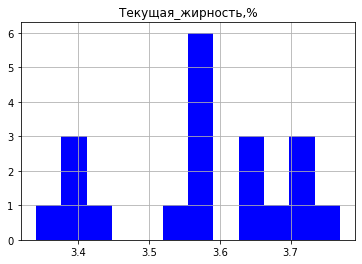

In [47]:
cow_buy['Текущая_жирность,%'].hist(bins=12, color='blue')
plt.title("Текущая_жирность,%")
plt.show()

Жирность молока от 3.4 до 3.7. Различных значений немного

In [48]:
cow_buy['Текущий_уровень_белок,%'].unique()

array([3.076, 3.081, 3.074, 3.061, 3.053, 3.079, 3.055, 3.073, 3.046,
       3.075, 3.065, 3.069])

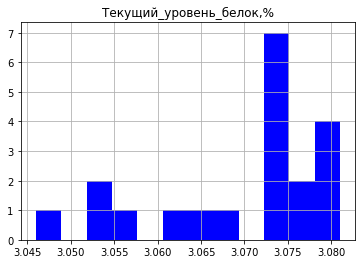

In [49]:
cow_buy['Текущий_уровень_белок,%'].hist(bins=12, color='blue')
plt.title("Текущий_уровень_белок,%")
plt.show()

<AxesSubplot:ylabel='Порода'>

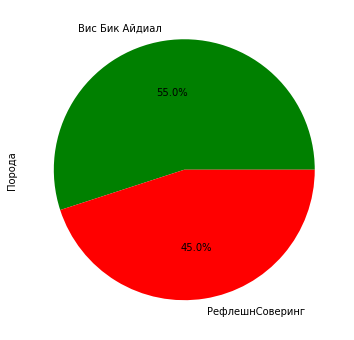

In [50]:
cow_buy_table = cow_buy['Порода'].value_counts()
cow_buy_table.index = ['Вис Бик Айдиал', 'РефлешнСоверинг']
cow_buy_table.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['g', 'r'])

<AxesSubplot:ylabel='Тип пастбища'>

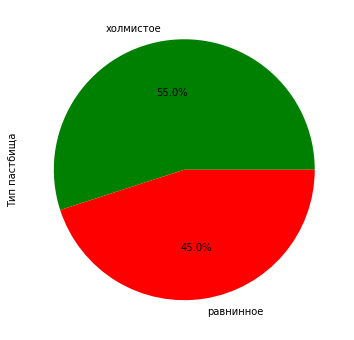

In [51]:
cow_buy_table = cow_buy['Тип пастбища'].value_counts()
cow_buy_table.index = cow_buy['Тип пастбища'].unique()
cow_buy_table.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['g', 'r'])

Видим, что распределение коров по типам пастбищ - 50/50

<AxesSubplot:ylabel='порода папы_быка'>

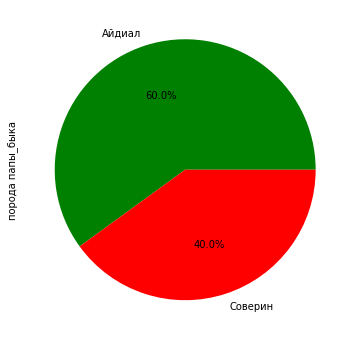

In [52]:
cow_buy_table = cow_buy['порода папы_быка'].value_counts()
cow_buy_table.index = cow_buy['порода папы_быка'].unique()
cow_buy_table.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['g', 'r'])

Коров, у которых порода папы быка - Айдиал, почти в два раза больше тех, у которых Соверин

In [53]:
cow_buy['Имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

<AxesSubplot:ylabel='Возраст'>

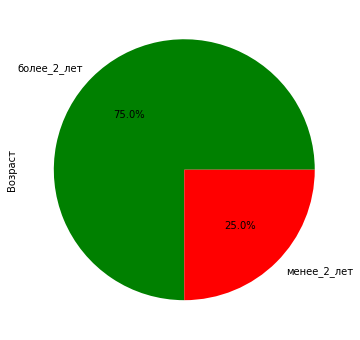

In [54]:
cow_buy_table = cow_buy['Возраст'].value_counts()
cow_buy_table.index = ['более_2_лет', 'менее_2_лет']
cow_buy_table.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['g', 'r'])

Коров, у которых возраст более 2-х лет в два раза больше тех, которые младше 2-х лет

### Выводы
Таким образом, заметили выбросы в ferma_main['Удой, кг'] - устранили их, также заметили, что данные в этом столбце имеют равномерное распределение. В таблице cow_buy некоторые признаки имеют распределение 50/50. Значения в столбцах жирности и белка в двух таблицах во многом похожи, но распределение % белка в ferma_main имеет необычное распределение с пиковым значением 3.7

## Корреляционный анализ

Рассчитаем коэффициенты корреляции между всеми признаками в таблицах ferma_main и cow_buy

In [55]:
corr = ferma_main.drop('id', axis=1).corr('spearman')
corr.style.background_gradient(cmap='RdYlGn')

,Удой,ЭКЕ,Сырой протеин,СПО,"Жирность,%","Белок,%"
Удой,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
ЭКЕ,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
Сырой протеин,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
СПО,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
"Жирность,%",0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
"Белок,%",-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


In [56]:
ferma_main.head()

,id,Удой,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [57]:
ferma_main_taste = ferma_main[ferma_main['Вкус молока'] == 'вкусно']
corr = ferma_main_taste.drop('id', axis=1).corr('spearman')
corr.style.background_gradient(cmap='RdYlGn')

,Удой,ЭКЕ,Сырой протеин,СПО,"Жирность,%","Белок,%"
Удой,1.000000,0.754669,0.426568,0.790906,0.652139,-0.057604
ЭКЕ,0.754669,1.000000,0.351734,0.713516,0.625173,-0.056737
Сырой протеин,0.426568,0.351734,1.000000,0.471016,0.338607,0.234004
СПО,0.790906,0.713516,0.471016,1.000000,0.677374,0.070223
"Жирность,%",0.652139,0.625173,0.338607,0.677374,1.000000,0.021851
"Белок,%",-0.057604,-0.056737,0.234004,0.070223,0.021851,1.000000


In [58]:
ferma_main_nottaste = ferma_main[ferma_main['Вкус молока'] == 'не вкусно']
corr = ferma_main_nottaste.drop('id', axis=1).corr('spearman')
corr.style.background_gradient(cmap='RdYlGn')

,Удой,ЭКЕ,Сырой протеин,СПО,"Жирность,%","Белок,%"
Удой,1.000000,0.794565,0.438077,0.798951,0.721866,0.037941
ЭКЕ,0.794565,1.000000,0.387542,0.741362,0.727447,-0.018775
Сырой протеин,0.438077,0.387542,1.000000,0.461274,0.419087,0.185662
СПО,0.798951,0.741362,0.461274,1.000000,0.691317,0.102929
"Жирность,%",0.721866,0.727447,0.419087,0.691317,1.000000,0.035229
"Белок,%",0.037941,-0.018775,0.185662,0.102929,0.035229,1.000000


Видим, что когда молоко вкусное в основном все признаки менее взаимосвязаны между собой, чем при невкусном молоке

In [59]:
corr = cow_buy.corr()
corr.style.background_gradient(cmap='RdYlGn')

,"Текущая_жирность,%","Текущий_уровень_белок,%"
"Текущая_жирность,%",1.000000,-0.262722
"Текущий_уровень_белок,%",-0.262722,1.000000


In [60]:
ferma_main.head()

,id,Удой,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [61]:
def scatterplot(digits_attr, category_attr, df):
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=digits_attr, y='Удой', hue=c, palette='bright')
    plt.xlabel(digits_attr)
    plt.ylabel('Удой')
    plt.title(f'Удой и {d}, цвет точек диаграммы отображает признак {c}')
    plt.show()

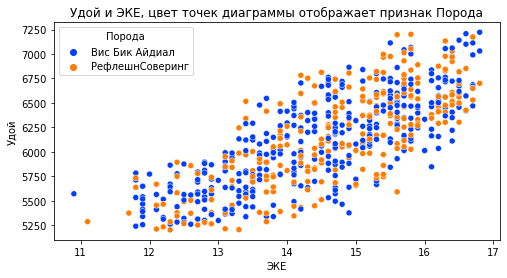

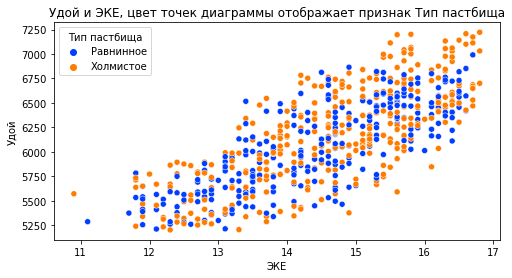

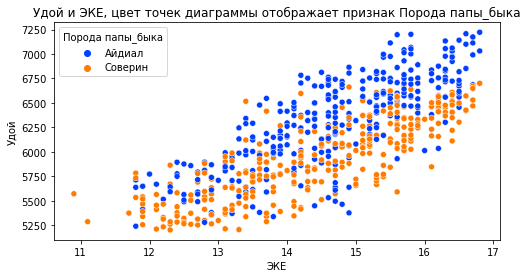

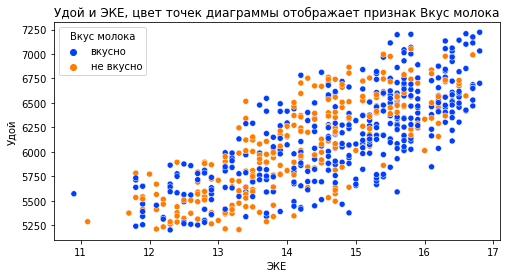

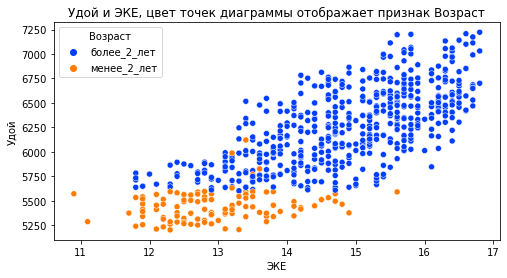

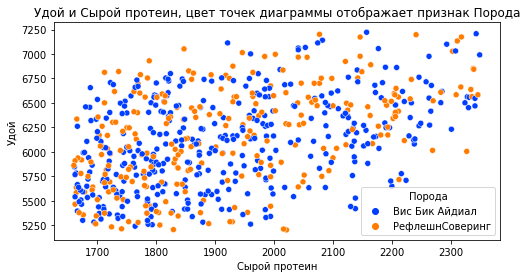

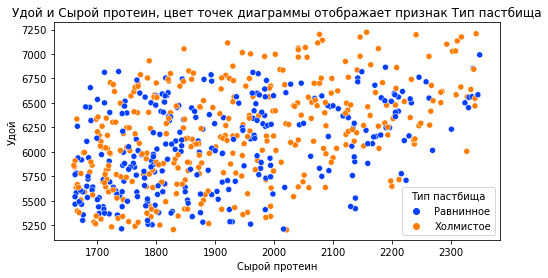

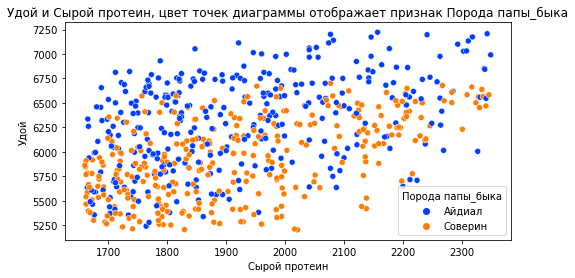

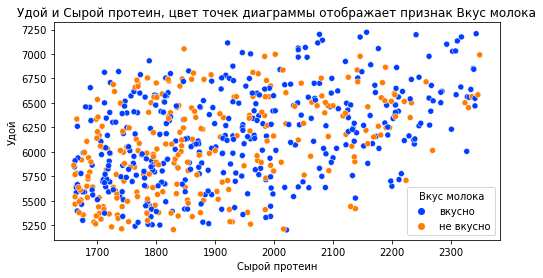

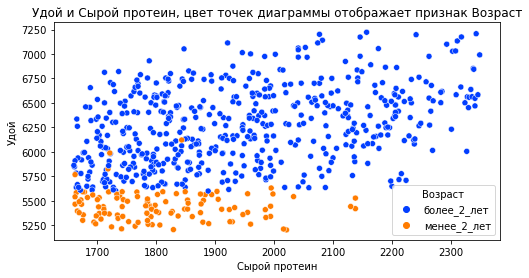

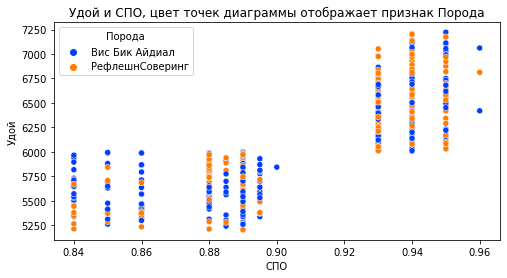

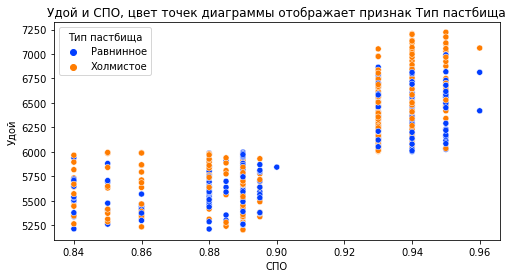

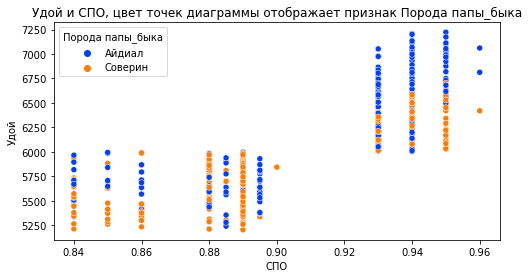

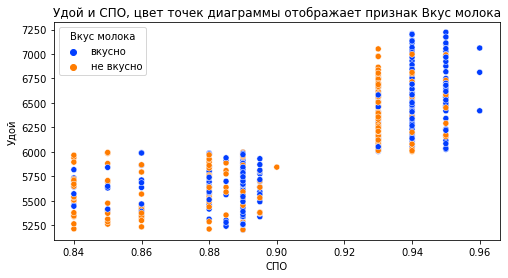

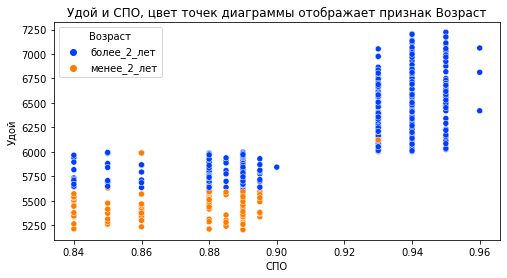

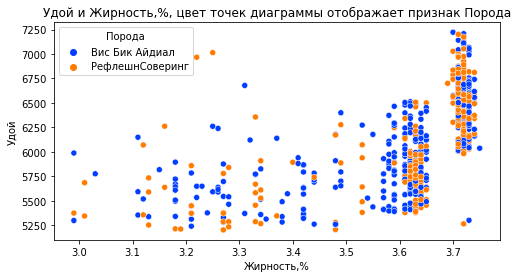

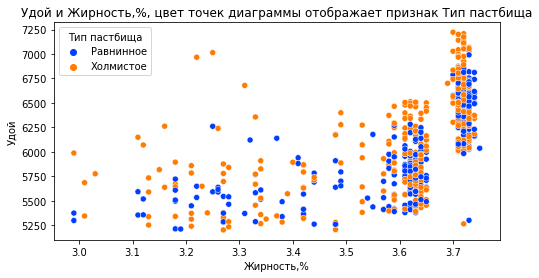

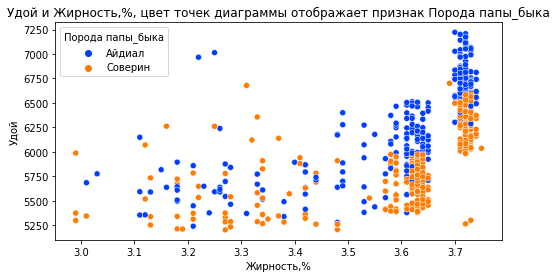

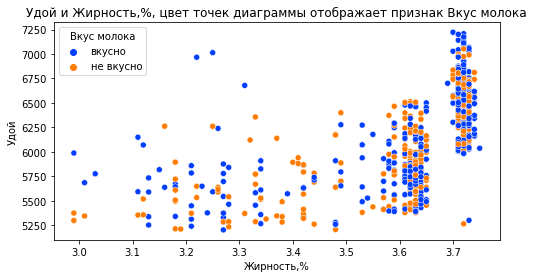

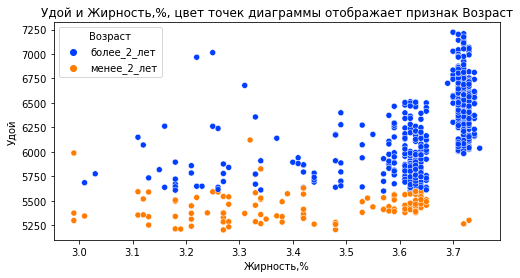

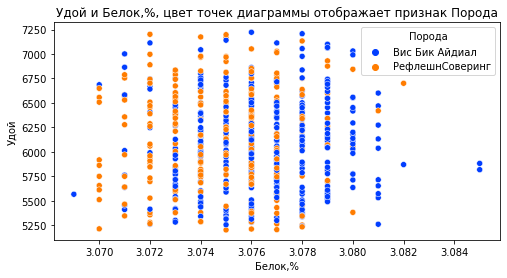

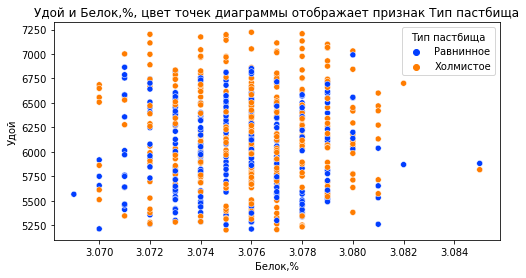

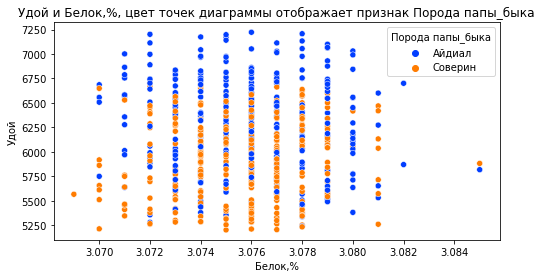

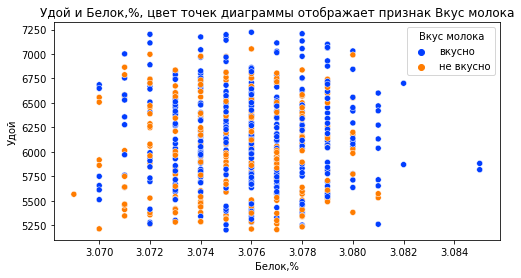

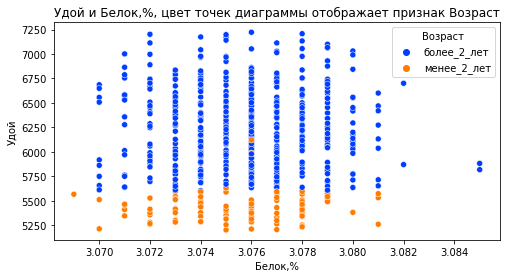

In [62]:
category_attributes = ['Порода', 'Тип пастбища', 'Порода папы_быка', 'Вкус молока', 'Возраст']
digits_attributes = ['ЭКЕ', 'Сырой протеин', 'СПО', 
                     'Жирность,%', 'Белок,%']
for d in digits_attributes:
    for c in category_attributes:
        scatterplot(d, c, ferma_main)

### Выводы

1. Между удой и протеином есть линейная зависимость. Диаграмма между удой и жирностью тоже напоминает линейную связь. Зависимость между удой и белком не является линейной.
2. У молодых коров в среднем ниже показатели по всем параметрам
3. Наблюдается мультиколлинеарность между признаками ЭКЕ, СПО и жирностью. Чтобы ее избежать можно удалить некоторые признаки
4. Белок имеет нелинейную связь с удой и остальными признаками

## Обучение модели линейной регрессии

In [63]:
ferma_main.head()

,id,Удой,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [64]:
X = ferma_main.drop(['Удой', 'id', 'Вкус молока'], axis=1)

In [65]:
y = ferma_main[['Удой']]

In [66]:
X.head()

,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Возраст
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет


In [67]:
y.head()

,Удой
0,5863
1,5529
2,5810
3,5895
4,5302


Для кодирования категориальных признаков будем использовать OneHotEncoder

In [68]:
X = pd.get_dummies(X, drop_first=True)

Разделим датасет на тренировочную и тестовую выборки

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
X_train.shape, X_test.shape

((471, 9), (157, 9))

Будем использовать масштабирование для количественных признаков

In [71]:
X_train_quantitative = X_train[['ЭКЕ', 'Сырой протеин', 'СПО']]
X_test_quantitative = X_test[['ЭКЕ', 'Сырой протеин', 'СПО']]

In [72]:
scaler = StandardScaler()
scaler.fit(X_train_quantitative)
X_train_new = scaler.transform(X_train_quantitative)
X_test_new = scaler.transform(X_test_quantitative)
X_train_quantitative = pd.DataFrame(X_train_new, columns=X_train_quantitative.columns, index=X_train_quantitative.index)
X_test_quantitative = pd.DataFrame(X_test_new, columns=X_test_quantitative.columns, index=X_test_quantitative.index)

In [73]:
X_train_quantitative.head()

,ЭКЕ,Сырой протеин,СПО
508,1.502378,1.079523,0.837130
383,-1.557270,-0.196920,-0.703660
587,0.125537,-1.386085,-1.011818
197,-0.103937,0.752230,0.837130
328,-1.098323,0.828598,-0.703660


In [74]:
X_test_quantitative.head()

,ЭКЕ,Сырой протеин,СПО
582,-0.486393,-0.813322,-1.011818
592,1.425887,0.026730,0.837130
551,-0.486393,-0.682405,-1.628134
214,-0.945340,-1.058792,-1.011818
486,0.584484,-1.413360,-0.703660


In [75]:
X_train_categorical = X_train[['Порода_РефлешнСоверинг', 'Тип пастбища_Холмистое', 'Порода папы_быка_Соверин', 'Возраст_менее_2_лет']]
X_test_categorical = X_test[['Порода_РефлешнСоверинг', 'Тип пастбища_Холмистое', 'Порода папы_быка_Соверин', 'Возраст_менее_2_лет']]

In [76]:
X_train_categorical.head()

,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет
508,1,1,1,0
383,1,1,1,1
587,0,0,0,0
197,0,1,0,0
328,0,0,0,0


In [77]:
X_train_categorical.head()

,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет
508,1,1,1,0
383,1,1,1,1
587,0,0,0,0
197,0,1,0,0
328,0,0,0,0


Объединим категориальные и количественные признаки

In [78]:
X_train = pd.merge(X_train_quantitative, X_train_categorical, left_index=True, right_index=True)
X_train.head()

,ЭКЕ,Сырой протеин,СПО,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет
508,1.502378,1.079523,0.837130,1,1,1,0
383,-1.557270,-0.196920,-0.703660,1,1,1,1
587,0.125537,-1.386085,-1.011818,0,0,0,0
197,-0.103937,0.752230,0.837130,0,1,0,0
328,-1.098323,0.828598,-0.703660,0,0,0,0


In [79]:
X_test = pd.merge(X_test_quantitative, X_test_categorical, left_index=True, right_index=True)
X_test.head()

,ЭКЕ,Сырой протеин,СПО,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет
582,-0.486393,-0.813322,-1.011818,0,1,0,0
592,1.425887,0.026730,0.837130,1,1,1,0
551,-0.486393,-0.682405,-1.628134,1,1,1,1
214,-0.945340,-1.058792,-1.011818,0,0,1,0
486,0.584484,-1.413360,-0.703660,0,1,1,0


Теперь, когда у нас есть два подготовленных датасета, можем обучить модель

In [80]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)

In [81]:
r2 = r2_score(y_test, pred1)
r2

0.7844078173416967

Посчитаем другие метрики - MSE, MAE, RMSE

In [82]:
mse = mean_squared_error(y_test, pred1)
rmse = mean_squared_error(y_test, pred1, squared=False)
mae = mean_absolute_error(y_test, pred1)
mse, rmse, mae

(43887.015009660514, 209.4922791170608, 164.24194463474925)

Проведем анализ остатков модели

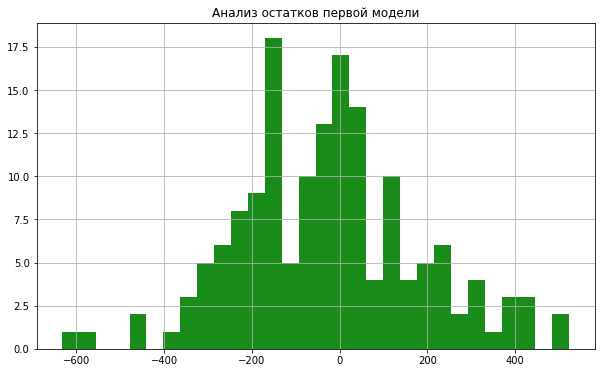

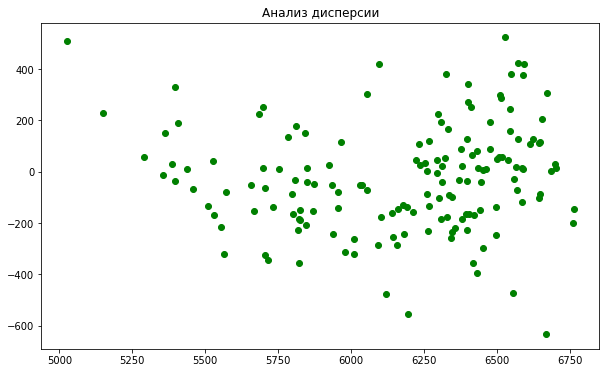

In [83]:
res = y_test - pred1
plt.figure(figsize=(10, 6))
plt.hist(res, bins=30, color='g', alpha=0.9)
plt.title('Анализ остатков первой модели')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.title('Анализ дисперсии')
plt.scatter(pred1, res, color='green')
plt.show()

Видим, что остатки распределены нормально и симметричны примерно относительно 0. Симметрия немного смещена влево, это значит, что модель иногда дает слишком большие предсказания. Также есть выбросы, что не очень хорошо 

### Выводы
* значение метрики r2 модели равно 0.79
* учитывая анализ остатков, можем сказать, что модель в среднем предсказывает значение больше реального
* Нужны дополнительные исследования, так как анализ остатков показывает выбросы

Подготовим данные для обучения второй модели. В этот раз отберем только те, признаки, которые линейно зависят от целевого. 

In [84]:
ferma_main.head()

,id,Удой,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [85]:
X = ferma_main.drop(['Удой', 'id', 'Белок,%', 'Вкус молока'], axis=1)

In [86]:
y = ferma_main[['Удой']]

Преобразуем значение СПО в бинарный признак, установив границу 0.9

In [87]:
def SPO(row):
    if row['СПО'] >= 0.9:
        return "Больше 0.9"
    else:
        return "Меньше 0.9"
X['СПО'] = X.apply(SPO, axis=1)    

Возведем ЭКЕ в квадрат, чтобы исключить нелинейность

In [88]:
X['ЭКЕ'] = X['ЭКЕ'] ** 2

In [89]:
X.head()

,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%",Возраст
0,201.64,1743,Меньше 0.9,Вис Бик Айдиал,Равнинное,Айдиал,3.58,более_2_лет
1,163.84,2138,Меньше 0.9,Вис Бик Айдиал,Равнинное,Соверин,3.54,менее_2_лет
2,196.00,1854,Меньше 0.9,РефлешнСоверинг,Холмистое,Соверин,3.59,более_2_лет
3,153.76,2012,Меньше 0.9,РефлешнСоверинг,Холмистое,Айдиал,3.40,более_2_лет
4,163.84,1675,Меньше 0.9,Вис Бик Айдиал,Равнинное,Соверин,3.73,менее_2_лет


In [90]:
y.head()

,Удой
0,5863
1,5529
2,5810
3,5895
4,5302


In [91]:
X = pd.get_dummies(X, drop_first=True)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
X_train_quantitative = X_train[['ЭКЕ', 'Сырой протеин']]
X_test_quantitative = X_test[['ЭКЕ', 'Сырой протеин']]

In [94]:
scaler = StandardScaler()
scaler.fit(X_train_quantitative)
X_train_new = scaler.transform(X_train_quantitative)
X_test_new = scaler.transform(X_test_quantitative)
X_train_quantitative = pd.DataFrame(X_train_new, columns=X_train_quantitative.columns, index=X_train_quantitative.index)
X_test_quantitative = pd.DataFrame(X_test_new, columns=X_test_quantitative.columns, index=X_test_quantitative.index)

In [95]:
X_train.head()

,ЭКЕ,Сырой протеин,"Жирность,%",СПО_Меньше 0.9,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет
508,272.25,2123,3.70,0,1,1,1,0
383,156.25,1889,3.34,1,1,1,1,1
587,216.09,1671,3.18,1,0,0,0,0
197,207.36,2063,3.62,0,0,1,0,0
328,171.61,2077,3.64,1,0,0,0,0


In [96]:
X_train_categorical = X_train[['СПО_Меньше 0.9', 'Порода_РефлешнСоверинг', 'Тип пастбища_Холмистое', 'Порода папы_быка_Соверин', 'Возраст_менее_2_лет']]
X_test_categorical = X_test[['СПО_Меньше 0.9', 'Порода_РефлешнСоверинг', 'Тип пастбища_Холмистое', 'Порода папы_быка_Соверин', 'Возраст_менее_2_лет']]

In [97]:
X_train_categorical = pd.get_dummies(X_train_categorical, drop_first=True)
X_test_categorical = pd.get_dummies(X_test_categorical, drop_first=True)

In [98]:
X_train = pd.merge(X_train_quantitative, X_train_categorical, left_index=True, right_index=True)
X_train.head()

,ЭКЕ,Сырой протеин,СПО_Меньше 0.9,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет
508,1.577968,1.079523,0,1,1,1,0
383,-1.511438,-0.196920,1,1,1,1,1
587,0.082269,-1.386085,1,0,0,0,0
197,-0.150235,0.752230,0,0,1,0,0
328,-1.102358,0.828598,1,0,0,0,0


In [99]:
X_test = pd.merge(X_test_quantitative, X_test_categorical, left_index=True, right_index=True)
X_test.head()

,ЭКЕ,Сырой протеин,СПО_Меньше 0.9,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет
582,-0.527089,-0.813322,1,0,1,0,0
592,1.490346,0.026730,0,1,1,1,0
551,-0.527089,-0.682405,1,1,1,1,1
214,-0.961737,-1.058792,1,0,0,1,0
486,0.561660,-1.413360,1,0,1,1,0


In [100]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

In [101]:
r2 = r2_score(y_test, pred2)
r2

0.8177696341282363

In [102]:
mse = mean_squared_error(y_test, pred2)
rmse = mean_squared_error(y_test, pred2, squared=False)
mae = mean_absolute_error(y_test, pred2)
mse, rmse, mae

(37095.717959799615, 192.6024868993119, 149.15000962733404)

Проведем анализ остатков для второй модели

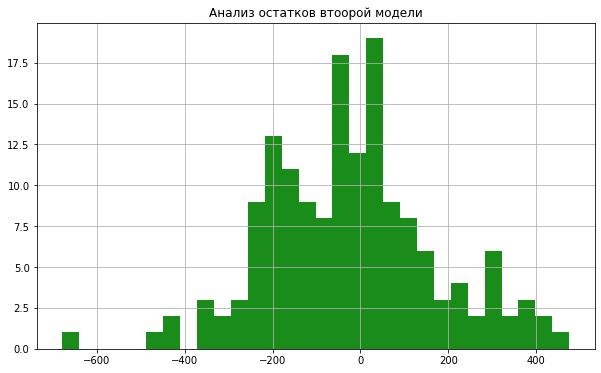

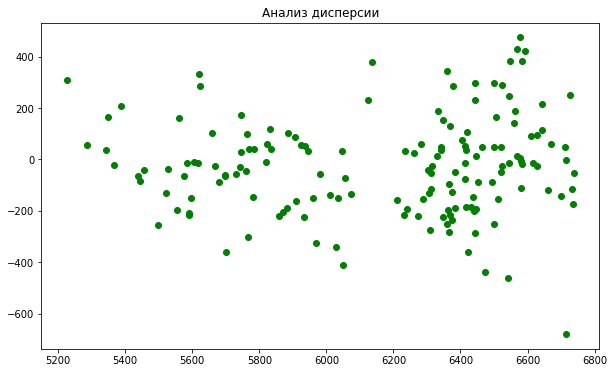

In [103]:
res = y_test - pred2
plt.figure(figsize=(10, 6))
plt.hist(res, bins=30, color='g', alpha=0.9)
plt.title('Анализ остатков втоорой модели')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.title('Анализ дисперсии')
plt.scatter(pred2, res, color='green')
plt.show()

### Выводы
* Метрика r2 для этой модели равна 0.82. Это ближе к 1, следовательно, модель работает лучше чуть лучше первой
* При анализе остатков симметрия смещается вправо от 0, значит, модель будет часто предсказывать значение меньше реального
* На этот раз при анализе остатков меньше выбросов, в этом пункте данная модель также лучше первой

Добавим новый признак - имя папы коровы и обучим на них третью модель

In [104]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [105]:
ferma_main.shape, ferma_dad.shape

((628, 12), (629, 2))

In [106]:
ferma_main_with_dad = pd.merge(ferma_main, ferma_dad, left_index=True, right_index=True)
ferma_main_with_dad = ferma_main_with_dad.drop('id_y', axis=1)
ferma_main_with_dad.rename(columns={'id_x':'id'}, inplace=True)
ferma_main_with_dad.head()

,id,Удой,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [107]:
X = ferma_main_with_dad.drop(['Удой', 'id', 'Белок,%', 'Вкус молока'], axis=1)
y = ferma_main_with_dad[['Удой']]

In [108]:
def SPO(row):
    if row['СПО'] >= 0.9:
        return "Больше 0.9"
    else:
        return "Меньше 0.9"
X['СПО'] = X.apply(SPO, axis=1)   

In [109]:
X['ЭКЕ'] = X['ЭКЕ'] ** 2

In [110]:
X.head()

,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%",Возраст,Имя Папы
0,201.64,1743,Меньше 0.9,Вис Бик Айдиал,Равнинное,Айдиал,3.58,более_2_лет,Буйный
1,163.84,2138,Меньше 0.9,Вис Бик Айдиал,Равнинное,Соверин,3.54,менее_2_лет,Соловчик
2,196.00,1854,Меньше 0.9,РефлешнСоверинг,Холмистое,Соверин,3.59,более_2_лет,Барин
3,153.76,2012,Меньше 0.9,РефлешнСоверинг,Холмистое,Айдиал,3.40,более_2_лет,Буйный
4,163.84,1675,Меньше 0.9,Вис Бик Айдиал,Равнинное,Соверин,3.73,менее_2_лет,Барин


In [111]:
y.head()

,Удой
0,5863
1,5529
2,5810
3,5895
4,5302


In [112]:
X = pd.get_dummies(X, drop_first=True)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [114]:
X_train_quantitative = X_train[['ЭКЕ', 'Сырой протеин']]
X_test_quantitative = X_test[['ЭКЕ', 'Сырой протеин']]
scaler = StandardScaler()
scaler.fit(X_train_quantitative)
X_train_new = scaler.transform(X_train_quantitative)
X_test_new = scaler.transform(X_test_quantitative)
X_train_quantitative = pd.DataFrame(X_train_new, columns=X_train_quantitative.columns, index=X_train_quantitative.index)
X_test_quantitative = pd.DataFrame(X_test_new, columns=X_test_quantitative.columns, index=X_test_quantitative.index)

In [115]:
X_train.head()

,ЭКЕ,Сырой протеин,"Жирность,%",СПО_Меньше 0.9,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет,Имя Папы_Буйный,Имя Папы_Геркулес,Имя Папы_Соловчик
508,272.25,2123,3.70,0,1,1,1,0,0,0,1
383,156.25,1889,3.34,1,1,1,1,1,0,0,0
587,216.09,1671,3.18,1,0,0,0,0,1,0,0
197,207.36,2063,3.62,0,0,1,0,0,1,0,0
328,171.61,2077,3.64,1,0,0,0,0,0,1,0


In [116]:
X_train_categorical = X_train[['СПО_Меньше 0.9', 'Порода_РефлешнСоверинг', 'Тип пастбища_Холмистое', 'Порода папы_быка_Соверин', 'Возраст_менее_2_лет', 'Имя Папы_Буйный', 'Имя Папы_Геркулес', 'Имя Папы_Соловчик']]
X_test_categorical = X_test[['СПО_Меньше 0.9', 'Порода_РефлешнСоверинг', 'Тип пастбища_Холмистое', 'Порода папы_быка_Соверин', 'Возраст_менее_2_лет', 'Имя Папы_Буйный', 'Имя Папы_Геркулес', 'Имя Папы_Соловчик']]
X_train_categorical = pd.get_dummies(X_train_categorical, drop_first=True)
X_test_categorical = pd.get_dummies(X_test_categorical, drop_first=True)

In [117]:
X_train = pd.merge(X_train_quantitative, X_train_categorical, left_index=True, right_index=True)
X_train.head()

,ЭКЕ,Сырой протеин,СПО_Меньше 0.9,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет,Имя Папы_Буйный,Имя Папы_Геркулес,Имя Папы_Соловчик
508,1.577968,1.079523,0,1,1,1,0,0,0,1
383,-1.511438,-0.196920,1,1,1,1,1,0,0,0
587,0.082269,-1.386085,1,0,0,0,0,1,0,0
197,-0.150235,0.752230,0,0,1,0,0,1,0,0
328,-1.102358,0.828598,1,0,0,0,0,0,1,0


In [118]:
X_test = pd.merge(X_test_quantitative, X_test_categorical, left_index=True, right_index=True)
X_test.head()

,ЭКЕ,Сырой протеин,СПО_Меньше 0.9,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет,Имя Папы_Буйный,Имя Папы_Геркулес,Имя Папы_Соловчик
582,-0.527089,-0.813322,1,0,1,0,0,0,1,0
592,1.490346,0.026730,0,1,1,1,0,0,0,1
551,-0.527089,-0.682405,1,1,1,1,1,0,0,0
214,-0.961737,-1.058792,1,0,0,1,0,0,0,0
486,0.561660,-1.413360,1,0,1,1,0,0,0,0


Когда данные готовы можно обучить на них третью модель

In [119]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)

In [120]:
r2 = r2_score(y_test, pred3)
r2

0.8245196485602115

In [121]:
mse = mean_squared_error(y_test, pred3)
rmse = mean_squared_error(y_test, pred3, squared=False)
mae = mean_absolute_error(y_test, pred3)
mse, rmse, mae

(35721.65151156926, 189.0017235677211, 146.27150820234186)

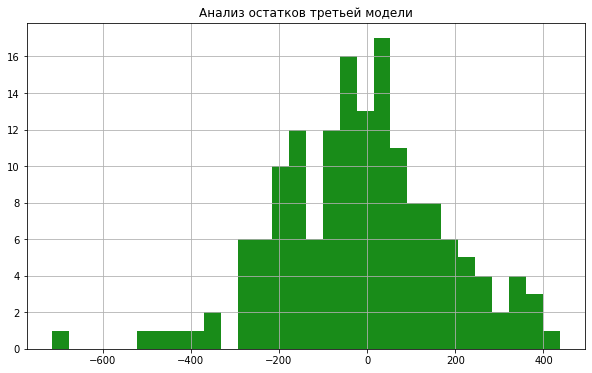

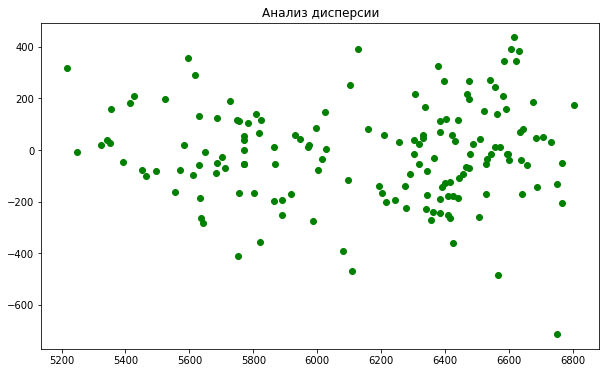

In [122]:
res = y_test - pred3
plt.figure(figsize=(10, 6))
plt.hist(res, bins=30, color='g', alpha=0.9)
plt.title('Анализ остатков третьей модели')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.title('Анализ дисперсии')
plt.scatter(pred3, res, color='green')
plt.show()

### Выводы
* Гистограмма анализа остатков симметрична 0 и имеет нормальное распределение
* Выбросов немного
* Метрика r2 лучше, чем у двух предыдущих моделей и равна 0.82

### Сравним три получившихся модели:
* лучший итог показывает третья модель, она дает не смещенный от реального результат
* Метрики r2 моделей равны соответственно: 0.79, 0.81, 0.82
* все модели имеют выбросы на гистограмме анализа остатков
* параметр - имя папы коровы помог улучшить третью модель

### Сравнение моделей по метрикам MAE, MSE, RMSE

|   MSE    |   RMSE   |   MAE    |
|----------|----------|----------|
|  41278.0 |   203.2  |  156.8   |
|  36968.2 |   192.3  |  147.0   |
|  35762.4 |   189.1  |  145.8   |

Чем ближе метрики RMSE и MAE к 0, тем лучше модель. Посмотрим на таблицу (первая строка - первая модель и тд). Видим, что последняя модель оказалась лучше остальных по остальным метрикам. Можем сделать вывод, что лучшая модель - третья

Укажем доверительный интервал для этой модели

In [123]:
lower_quantile = np.percentile(res, 2.5)
upper_quantile = np.percentile(res, 97.5)

Теперь попробуем с помощью нее спрогнозировать удой коров, которых фермер хочет купить

In [124]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Добавим недостающие признаки из ferma_main

In [125]:
ferma_main.head()

,id,Удой,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [126]:
cow_buy['ЭКЕ'] = ferma_main['ЭКЕ'].median() / 100 * 105
cow_buy['Сырой протеин'] = ferma_main['Сырой протеин'].median() / 100 * 105
cow_buy['СПО'] = ferma_main['СПО'].median() / 100 * 105
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,ЭКЕ,Сырой протеин,СПО
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,1982.4,0.9765
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,1982.4,0.9765
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,1982.4,0.9765
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,1982.4,0.9765
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,1982.4,0.9765


Далее сделаем подготовку данных

In [127]:
def SPO(row):
    if row['СПО'] >= 0.9:
        return "Больше 0.9"
    else:
        return "Меньше 0.9"
cow_buy['СПО'] = cow_buy.apply(SPO, axis=1)  

In [128]:
cow_buy['ЭКЕ'] = cow_buy['ЭКЕ'] ** 2

In [129]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,ЭКЕ,Сырой протеин,СПО
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,238.239225,1982.4,Больше 0.9
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,238.239225,1982.4,Больше 0.9
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,238.239225,1982.4,Больше 0.9
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,238.239225,1982.4,Больше 0.9
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,238.239225,1982.4,Больше 0.9


In [130]:
cow_buy_ln = pd.get_dummies(cow_buy, drop_first=True)

In [131]:
data_quantitative = cow_buy_ln[['ЭКЕ', 'Сырой протеин']]
data_categorical = cow_buy_ln[['Порода_РефлешнСоверинг', 'Тип пастбища_холмистое', 'порода папы_быка_Соверин', 'Возраст_менее_2_лет', 'Имя_папы_Буйный', 'Имя_папы_Геркулес', 'Имя_папы_Соловчик']]

In [132]:
data_quantitative_scaled = scaler.transform(data_quantitative)
data_quantitative = pd.DataFrame(data_quantitative_scaled, columns=data_quantitative.columns, index=data_quantitative.index)

In [133]:
data_cow_buy = data_quantitative
data_cow_buy['СПО_Меньше 0.9'] = 0
data_cow_buy = pd.merge(data_cow_buy, data_categorical, left_index=True, right_index=True)
data_cow_buy.head()

,ЭКЕ,Сырой протеин,СПО_Меньше 0.9,Порода_РефлешнСоверинг,Тип пастбища_холмистое,порода папы_быка_Соверин,Возраст_менее_2_лет,Имя_папы_Буйный,Имя_папы_Геркулес,Имя_папы_Соловчик
0,0.672165,0.312566,0,0,1,0,0,0,1,0
1,0.672165,0.312566,0,0,0,1,1,1,0,0
2,0.672165,0.312566,0,1,0,1,0,0,0,0
3,0.672165,0.312566,0,1,1,0,0,1,0,0
4,0.672165,0.312566,0,1,0,0,0,1,0,0


In [134]:
pred_cow_buy = model3.predict(data_cow_buy)

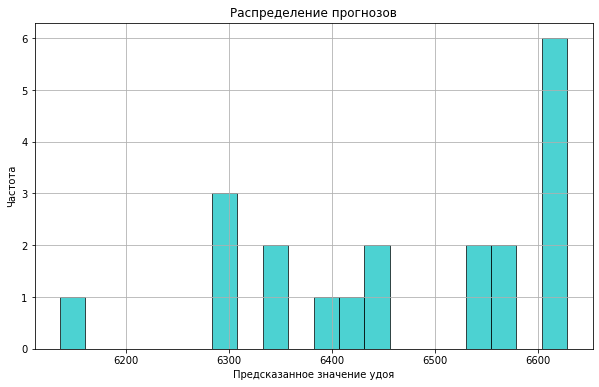

In [135]:
plt.figure(figsize=(10, 6))
plt.hist(pred_cow_buy, bins=len(pred_cow_buy), color='c', edgecolor='k', alpha=0.7)
plt.title('Распределение прогнозов')
plt.xlabel('Предсказанное значение удоя')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Таким образом, мы получили предсказанные значения удоя коров, используя третью модель. На гистограмме выше видим, что по 4 коровы дают удой около 6250 кг, 4 - 6450, 3 - 6500 и так далее

### Вывод
В этом пункте мы обучили три модели линейной регрессии для предсказания удоя коров, выяснили какая из них лучше по различным метрикам и использовали ее для предсказания удоя коров, которых покупатель хочет приобрести

## Обучение модели логистической регрессии

In [136]:
ferma_main_with_dad.head()

,id,Удой,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [137]:
X = ferma_main_with_dad.drop(['id', 'Удой', 'Вкус молока'], axis=1)
y = ferma_main_with_dad['Вкус молока']

In [138]:
X.head()

,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет,Буйный
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет,Соловчик
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет,Барин
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет,Буйный
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет,Барин


In [139]:
def SPO(row):
    if row['СПО'] >= 0.9:
        return "Больше 0.9"
    else:
        return "Меньше 0.9"
X['СПО'] = X.apply(SPO, axis=1)   

In [140]:
X['ЭКЕ'] = X['ЭКЕ'] ** 2

In [141]:
X.head()

,ЭКЕ,Сырой протеин,СПО,Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы
0,201.64,1743,Меньше 0.9,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет,Буйный
1,163.84,2138,Меньше 0.9,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет,Соловчик
2,196.00,1854,Меньше 0.9,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет,Барин
3,153.76,2012,Меньше 0.9,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет,Буйный
4,163.84,1675,Меньше 0.9,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет,Барин


Категориальные признаки кодируем с помощью OneHotEncoder

In [142]:
X = pd.get_dummies(X, drop_first=True)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Для количественных признаков сделаем масштабирование с помощью StandardScaler

In [144]:
X_train_quantitative = X_train[['ЭКЕ', 'Сырой протеин', 'Жирность,%', 'Белок,%']]
X_test_quantitative = X_test[['ЭКЕ', 'Сырой протеин', 'Жирность,%', 'Белок,%']]
scaler = StandardScaler()
scaler.fit(X_train_quantitative)
X_train_new = scaler.transform(X_train_quantitative)
X_test_new = scaler.transform(X_test_quantitative)
X_train_quantitative = pd.DataFrame(X_train_new, columns=X_train_quantitative.columns, index=X_train_quantitative.index)
X_test_quantitative = pd.DataFrame(X_test_new, columns=X_test_quantitative.columns, index=X_test_quantitative.index)

In [145]:
X_train.head()

,ЭКЕ,Сырой протеин,"Жирность,%","Белок,%",СПО_Меньше 0.9,Порода_РефлешнСоверинг,Тип пастбища_Холмистое,Порода папы_быка_Соверин,Возраст_менее_2_лет,Имя Папы_Буйный,Имя Папы_Геркулес,Имя Папы_Соловчик
508,272.25,2123,3.70,3.074,0,1,1,1,0,0,0,1
383,156.25,1889,3.34,3.072,1,1,1,1,1,0,0,0
587,216.09,1671,3.18,3.079,1,0,0,0,0,1,0,0
197,207.36,2063,3.62,3.079,0,0,1,0,0,1,0,0
328,171.61,2077,3.64,3.076,1,0,0,0,0,0,1,0


In [146]:
X_train_categorical = X_train[['СПО_Меньше 0.9', 'Порода_РефлешнСоверинг', 'Тип пастбища_Холмистое', 'Порода папы_быка_Соверин', 'Возраст_менее_2_лет', 'Имя Папы_Буйный', 'Имя Папы_Геркулес', 'Имя Папы_Соловчик']]
X_test_categorical = X_test[['СПО_Меньше 0.9', 'Порода_РефлешнСоверинг', 'Тип пастбища_Холмистое', 'Порода папы_быка_Соверин', 'Возраст_менее_2_лет', 'Имя Папы_Буйный', 'Имя Папы_Геркулес', 'Имя Папы_Соловчик']]

In [147]:
X_train = pd.merge(X_train_quantitative, X_train_categorical, left_index=True, right_index=True)
X_test = pd.merge(X_test_quantitative, X_test_categorical, left_index=True, right_index=True)

In [148]:
y_train = pd.get_dummies(y_train).drop('не вкусно', axis=1)
y_test = pd.get_dummies(y_test).drop('не вкусно', axis=1)

In [149]:
X_train.shape

(471, 12)

In [150]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
y_pred_proba = model_lr.predict_proba(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [151]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

accuracy: 0.6305732484076433
precision: 0.6229508196721312
recall: 0.8636363636363636


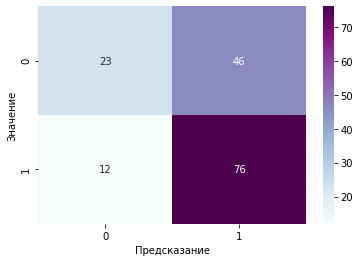

In [152]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Значение')
plt.xlabel('Предсказание')
plt.show()

В прогнозе коровы, которая дает вкусное молоко наиболее важно избежать ошибки второго рода. Так как нужно минимизировать вероятность приобретения коровы, которая не производит вкусное молоко. Precision измеряет, насколько часто модель дает правильные положительные прогнозы относительно всех положительных прогнозов, поэтому эта метрика наиболее важная

Сведем критичную ошибку к нулю

In [153]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]
data_pred = []
data_pred_best = []
for i in thresholds:
    for p in y_pred_proba:
        y = p[1]
        if y > i:
            data_pred.append(1)
        else:
            data_pred.append(0)
    precision = precision_score(y_test, data_pred)  
    print(precision, i)
    if precision == 1:
        data_pred_best = data_pred.copy()
        break
    data_pred = []

0.5605095541401274 0.1
0.5605095541401274 0.19
0.5641025641025641 0.28
0.5655172413793104 0.37
0.6 0.46
0.6607142857142857 0.55
0.7857142857142857 0.64
0.8333333333333334 0.73
1.0 0.82


Видим, что оптимальный порог - 0.82. В этом случае precision получается равным 1.0, то есть все значения, которым модель присвоит значение 1 будут в действительности равны 1

Посчитаем значения других метрик

In [154]:
accuracy = accuracy_score(y_test, data_pred_best)
recall = recall_score(y_test, data_pred_best)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

accuracy: 0.46496815286624205
precision: 1.0
recall: 0.045454545454545456


Остальные метрики имеют меньшее значение, чем раньше

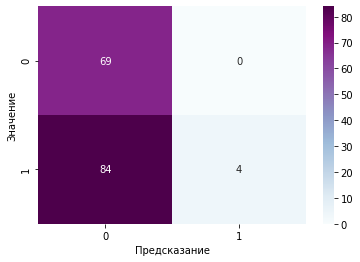

In [155]:
cm = confusion_matrix(y_test, data_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Значение')
plt.xlabel('Предсказание')
plt.show()

### Выводы
В этом пункте обучили модель логистической регрессии для предсказания вкуса молока. Наиболее важная метрика в данном случае - precission. Свели ошибку второго порядка к 0, теперь модель никогда не считает невкусное молоко вкусным, чтобы покупатель не потратил средства на эту корову. В качестве доработки модели можно улучшить метрику recall, чтобы минимизировать количество случаев, когда вкусное молоко модель считает невкусным. 

С помощью этой модели предскажем вкус молока коров, которых фермер хочет купить

In [156]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,ЭКЕ,Сырой протеин,СПО
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,238.239225,1982.4,Больше 0.9
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,238.239225,1982.4,Больше 0.9
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,238.239225,1982.4,Больше 0.9
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,238.239225,1982.4,Больше 0.9
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,238.239225,1982.4,Больше 0.9


In [157]:
cow_buy_lr = data_categorical = pd.get_dummies(cow_buy, drop_first=True)

In [158]:
data_quantitative = cow_buy_lr[['ЭКЕ', 'Сырой протеин', 'Текущая_жирность,%', 'Текущий_уровень_белок,%']]
data_quantitative_scaled = scaler.transform(data_quantitative)
data_quantitative = pd.DataFrame(data_quantitative_scaled, columns=data_quantitative.columns, index=data_quantitative.index)

In [159]:
data_categorical = cow_buy_lr[['Порода_РефлешнСоверинг', 'Тип пастбища_холмистое', 'порода папы_быка_Соверин', 'Возраст_менее_2_лет', 'Имя_папы_Буйный', 'Имя_папы_Геркулес', 'Имя_папы_Соловчик']]

In [160]:
data = data_quantitative
data['СПО_Меньше 0.9'] = 0
data = pd.merge(data, data_categorical, left_index=True, right_index=True)
data

,ЭКЕ,Сырой протеин,"Текущая_жирность,%","Текущий_уровень_белок,%",СПО_Меньше 0.9,Порода_РефлешнСоверинг,Тип пастбища_холмистое,порода папы_быка_Соверин,Возраст_менее_2_лет,Имя_папы_Буйный,Имя_папы_Геркулес,Имя_папы_Соловчик
0,0.672165,0.312566,-0.158918,0.094429,0,0,1,0,0,0,1,0
1,0.672165,0.312566,-0.399401,2.028176,0,0,0,1,1,1,0,0
2,0.672165,0.312566,-0.098797,-0.679069,0,1,0,1,0,0,0,0
3,0.672165,0.312566,-1.241093,-5.706810,0,1,1,0,0,1,0,0
4,0.672165,0.312566,0.201807,-0.679069,0,1,0,0,0,1,0,0
5,0.672165,0.312566,0.141686,-8.800805,0,1,0,1,1,0,1,0
6,0.672165,0.312566,-0.158918,0.094429,0,0,1,0,0,0,1,0
7,0.672165,0.312566,-0.219039,1.254677,0,0,0,1,0,1,0,0
8,0.672165,0.312566,-0.098797,-0.679069,0,1,0,1,0,0,0,0
9,0.672165,0.312566,-1.241093,1.254677,0,1,1,0,1,1,0,0


In [161]:
y_pred_proba = model_lr.predict(data)
y_pred_proba

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1],
      dtype=uint8)

### Выводы
С помощью обученной модели предсказали вкус молока коров, которых хочет купить покупатель - 10 из 16 дает вкусное молоко

## Итоговые выводы

Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер

In [162]:
cow_buy['Удой'] = pred_cow_buy
cow_buy['Вкус молока'] = y_pred_proba
def milk_taste(row):
    if row['Вкус молока'] == 1:
        return 'вкусно'
    else:
        return 'не вкусно'
cow_buy['Вкус молока'] = cow_buy.apply(milk_taste, axis=1)  
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,ЭКЕ,Сырой протеин,СПО,Удой,Вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,238.239225,1982.4,Больше 0.9,6621.138017,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,238.239225,1982.4,Больше 0.9,6388.167514,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,238.239225,1982.4,Больше 0.9,6290.666849,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,238.239225,1982.4,Больше 0.9,6605.130140,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,238.239225,1982.4,Больше 0.9,6552.305944,вкусно


Коровы, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко:

In [163]:
cow_buy[(cow_buy['Удой'] > 6000) & (cow_buy['Вкус молока'] == 'вкусно')]

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,ЭКЕ,Сырой протеин,СПО,Удой,Вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,238.239225,1982.4,Больше 0.9,6621.138017,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,238.239225,1982.4,Больше 0.9,6388.167514,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,238.239225,1982.4,Больше 0.9,6290.666849,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,238.239225,1982.4,Больше 0.9,6552.305944,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,238.239225,1982.4,Больше 0.9,6621.138017,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,238.239225,1982.4,Больше 0.9,6578.795155,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,238.239225,1982.4,Больше 0.9,6290.666849,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,238.239225,1982.4,Больше 0.9,6414.502499,вкусно
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,238.239225,1982.4,Больше 0.9,6628.050417,вкусно
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,238.239225,1982.4,Больше 0.9,6136.239711,вкусно


### Результаты работы моделей 
* фермер сможет купить 13 коров с минимальным риском для себя, так как они дают удой более 6000 килограммов в год и вкусное молоко
* следует выбирать коров с возрастом старше 2-х лет, тип пастбища и породы не сильно влияют на эффективность коровы


### Выводы о линейных моделях
* Для улучшения качества регрессионной модели приводили признаки из количественных в бинарные категориальные, добавляли новые, исключали нелинейность путем возведения значений в квадрат
* Можно еще улучшить результаты регрессионной модели путем добавления добавления новых признаков и удаления ненужных. Также возможно увеличить объем предоставленных данных 
* Наиболее важные метрики моделей классификации при анализе рисков - precission, recall, confusion matrix. Они позволяют минимизировать ошибки первого и второго рода